### Без проекции выбросов на сигмы

In [1]:
import numpy as np
from numpy import pi, abs
import matplotlib.pyplot as plt
import random
import pandas as pd
from functions import method1, method2, result_plot, result_plot_medicine_data, density, result_plot_ver2
# вывод графиков в файл

Text(0.5, 1.0, 'График функции Андрюса')

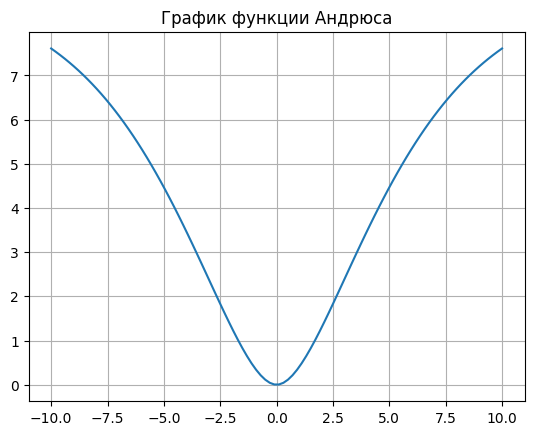

In [2]:
plt.plot(np.linspace(-10, 10, 100), density(np.linspace(-10, 10, 100)))
plt.grid(True)
plt.title('График функции Андрюса')

In [3]:
df = pd.read_excel('additional_data.xlsx')
lst_of_data = []
column_names = df.columns.to_numpy()
column_names_data = [column_names[i] for i in range(0, len(column_names), 2)]
column_names_outliers_indices = [column_names[i] for i in range(1, len(column_names), 2)]
data = df[column_names_data].to_numpy().T
outliers_indices = df[column_names_outliers_indices].to_numpy().T
print(data.shape)
for i in range(data.shape[0]):
    # fig, axs = plt.subplots(figsize = (7, 5), nrows= 1, ncols= 1)
    # fig.set_size_inches(7,5)
    new_data = data[i]
    new_data = new_data[~np.isnan(new_data)]
    indices = outliers_indices[i]
    indices = np.array(indices[~np.isnan(indices)], dtype=int)
    outliers = new_data[indices]
    data_without_outliers = np.delete(new_data, indices)
    original_indices = np.where(np.isin(new_data, data_without_outliers))[0]
    # axs.plot(indices, new_data[indices], color='b')
    # axs.plot(original_indices, data_without_outliers, color='b')    
    # axs.set_title(column_names_data[i])
    #axs.grid(True)
    lst_of_data.append((new_data, (data_without_outliers, original_indices), (outliers, indices)))
# fig.suptitle('Исходные данные')
# fig.tight_layout()

(18, 50)


In [4]:
n = 9

In [5]:
result_plot(lst_of_data, column_names_data, 2)

0.0  Data n=50, %=2

0.0  Data n=50, %=2 top



In [6]:
df = pd.read_excel('data.xlsx')
data = df.to_numpy().T
lst_data = []
columns_name = df.columns.to_list()
for i in range(data.shape[0]):
    new_data = data[i]
    new_data = new_data[~np.isnan(new_data)]
    lst_data.append(new_data)

In [7]:
result_plot_ver2(lst_data, columns_name)

In [8]:
all_sheets = pd.read_excel('MINDRAY Synovent E5.xlsx', sheet_name=None)

In [9]:
col_medicine = []
lst_data_medicine = []
for i, sheet in enumerate(list(all_sheets.keys())):
    if i <= 3:
        continue
    df = all_sheets[sheet]
    col = df.columns.to_list()
    for col in col:
        is_all_numeric = pd.to_numeric(df[col], errors='coerce').notna().all()
        if is_all_numeric:
            data = df[col]
            data = np.array(data[~np.isnan(data)], dtype=float)
            lst_data_medicine.append(data)
            col_medicine.append(col)


In [10]:
result_plot_medicine_data(lst_data_medicine, col_medicine)

/home/nikita/mephi/functions.py:27: RuntimeWarning: divide by zero encountered in divide
  u_0 = (np.sum(X / sigma_i_square)) / np.sum(1 / sigma_i_square)
/home/nikita/mephi/functions.py:27: RuntimeWarning: invalid value encountered in scalar divide
  u_0 = (np.sum(X / sigma_i_square)) / np.sum(1 / sigma_i_square)
/home/nikita/mephi/functions.py:28: RuntimeWarning: divide by zero encountered in divide
  W_i_0 = 1 / sigma_i_square
/home/nikita/mephi/functions.py:31: RuntimeWarning: invalid value encountered in scalar divide
  u_1 = np.sum(X * W_i_0) / np.sum(W_i_0)
